In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage.measure import label
from uncertainties import ufloat
import uncertainties as ct
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bblib

import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

In [2]:
"""
ob: open beam
dc: dark current
es: empty step wedge

"""
ob = rd.readImages('data/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
dc = rd.readImages('data/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
es = rd.readImages('data/02_rawdata/01_Stepwedges/container_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0) 
bb = rd.readImages('data/02_rawdata/01_Stepwedges/bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
bbes = rd.readImages('data/02_rawdata/01_Stepwedges/water_bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
water = rd.readImages('data/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
ob = ob[::-1]
dc = dc[::-1]
es = es[::-1]
bb = bb[::-1]
bbes = bbes[::-1]
water = water[::-1]

In [18]:
maskbb, rbb, cbb = bblib.get_black_bodies(bb, greythres=15000, areas=[0, 1000] , R=9)
maskbbes,rbbes,cbbes = bblib.get_black_bodies(bbes, greythres=12500, areas=[0, 1000], R=9)
maskbb[1000:, :] = 0
maskbbes[150:230, :] = 0
img_corr_bb = bblib.compute_scatter_image(bb, rbb, cbb)
img_corr_bbes = bblib.compute_scatter_image(bbes, rbbes, cbbes)

In [26]:
lower_bound = 0
upper_bound = 0

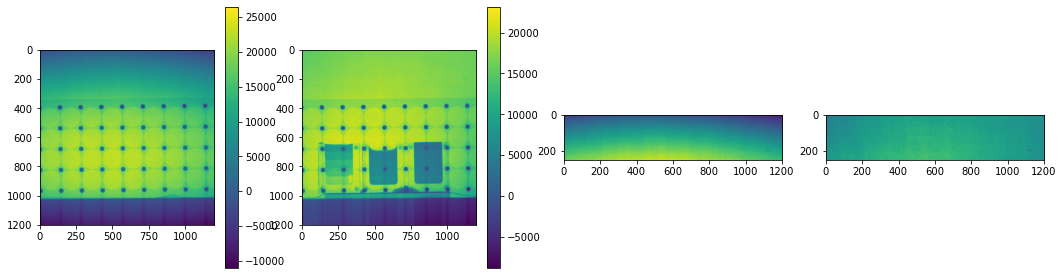

In [34]:
fig,ax = plt.subplots(1,4,figsize=[18,12])
a0=ax[0].imshow(bb - img_corr_bb - dc)

fig.colorbar(a0,ax=ax[0],shrink=0.4);

a1=ax[1].imshow(bbes - img_corr_bbes - dc)

fig.colorbar(a1,ax=ax[1],shrink=0.4);

img1 = bb - img_corr_bb - dc
img2 = bbes - img_corr_bbes - dc
ax[2].imshow(img1[0:250,:])
ax[3].imshow(img2[0:250,:])

In [46]:
D0 = (bb - dc - img_corr_bb)[0:250, :].mean()
D =  (water - dc - img_corr_bbes)[0:250, :].mean()

temp2 = (water - dc - img_corr_bbes) / (bb - dc - img_corr_bb)
temp2[temp2 < 1] = 1

p = -np.log(D0/D * temp2)

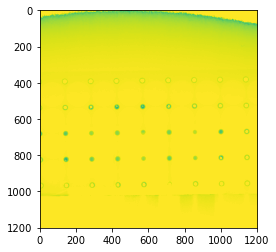

In [47]:
plt.imshow(p)